# Clustering - k-means and DBSCAN for IRIS, Seeds, Glass and PCB Datasets


In [1]:
import sklearn.datasets  # IRIS, WINE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, rand_score
from sklearn.metrics.cluster import contingency_matrix

In [2]:
from typing import NamedTuple, Any


class UciMlData(NamedTuple):
    ids: pd.DataFrame
    features: pd.DataFrame
    targets: pd.DataFrame
    original: pd.DataFrame
    headers: list[str]


class UciMlDataset(NamedTuple):
    data: UciMlData
    metadata: dict[str, Any]
    variables: pd.DataFrame

In [3]:
def purity_score(y_true, y_pred):
    contingency_mat = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_mat, axis=0)) / np.sum(contingency_mat)


def quality_metrics(X: pd.DataFrame, y_pred: pd.DataFrame):
    return pd.DataFrame(
        {
            "Silhouette": silhouette_score(X, y_pred),
            "Davies Bouldin": davies_bouldin_score(X, y_pred),
        },
        index=[0],
    )


def grouping_metrics(y_true: pd.DataFrame, y_pred: pd.DataFrame):
    return pd.DataFrame(
        {
            "Rand": rand_score(y_true.squeeze(), y_pred),
            "Purity": purity_score(y_true.squeeze(), y_pred),
        },
        index=[0],
    )

## 0. Load data


### IRIS


In [4]:
iris_dataset: UciMlDataset = fetch_ucirepo("iris")
X_iris = iris_dataset.data.features
y_iris = iris_dataset.data.targets

print("features: ", iris_dataset.feature_names)
print("shape", X_iris.shape)
print("target names: ", iris_dataset.target_names)

display(X_iris.head())
display(y_iris.head())

features:  None
shape (150, 4)
target names:  None


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### SEEDS


In [5]:
seeds_dataset = pd.read_csv(
    "data/seeds_dataset.txt",
    sep=",",
    header=None,
    names=[
        "area",
        "perimeter",
        "compactness",
        "length",
        "width",
        "asymmetry",
        "groove",
        "class",
    ],
)

X_seeds = seeds_dataset.drop(columns=["class"])
y_seeds = pd.DataFrame(seeds_dataset["class"])

print(seeds_dataset.shape)
display(X_seeds.head())
display(y_seeds.head())

(210, 8)


,area,perimeter,compactness,length,width,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


,class
0,1
1,1
2,1
3,1
4,1


### Glass


In [6]:
glass_dataset: UciMlDataset = fetch_ucirepo("glass")

X_glass = glass_dataset.data.features
y_glass = glass_dataset.data.targets

print(X_glass.shape)
display(X_glass.head())
display(y_glass.head())

(214, 9)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


,Type_of_glass
0,1
1,1
2,1
3,1
4,1


### PCB


In [7]:
pcb_dataset: UciMlDataset = fetch_ucirepo(id=365)

X_pcb = pcb_dataset.data.features
y_pcb = pcb_dataset.data.targets

print(X_pcb.shape)
display(X_pcb.head())
display(y_pcb.head())

(43405, 65)


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980


,class
0,0
1,0
2,0
3,0
4,0


## 1. k-means on IRIS


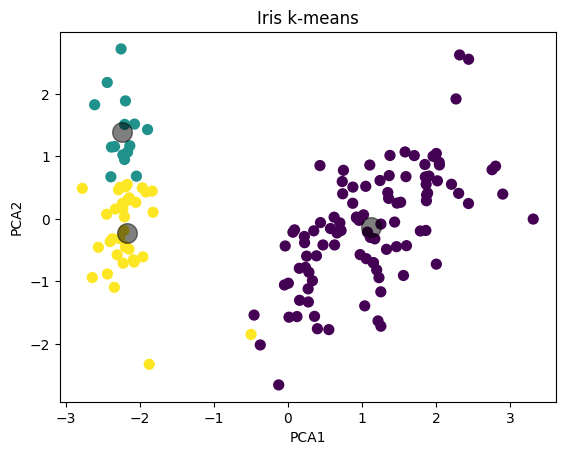

,Silhouette,Davies Bouldin
0,0.52565,0.608624


,Rand,Purity
0,0.726264,0.666667


In [8]:
# standardize
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# reduce dimensionality
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris_scaled)

# run k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_iris_pca)
y_kmeans = kmeans.predict(X_iris_pca)

# plot
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_kmeans, s=50, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)

plt.title("Iris k-means")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


display(quality_metrics(X_iris_pca, y_kmeans))
display(grouping_metrics(y_iris, y_kmeans))

## 2. k-means parameter tests on SEEDS and GLASS


- n_clusters – liczba klastrów (sprawdź najpierw na IRIS)
- n_init – liczba restartów
- max_iter – maksymalna liczba iteracji


In [66]:
n_clusters_range = range(2, 7)
n_init_range = range(3, 16, 4)
max_iter_range = range(20, 200, 50)


def test_k_means_params(X: pd.DataFrame, n_clusters: int, n_init: int, max_iter: int):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter)

    # standardize
    scale = StandardScaler()
    X_scaled = scale.fit_transform(X)

    y_kmeans = kmeans.fit_predict(X_scaled)
    return quality_metrics(X_scaled, y_kmeans).assign(
        n_clusters=n_clusters, n_init=n_init, max_iter=max_iter
    )


def test_all_params(X: pd.DataFrame, n_clusters_range, n_init_range, max_iter_range):
    results = []
    for n_clusters in n_clusters_range:
        for n_init in n_init_range:
            for max_iter in max_iter_range:
                res = test_k_means_params(X, n_clusters, n_init, max_iter)
                results.append(res)

    return pd.concat(results, ignore_index=True)

### SEEDS


In [67]:
results_seeds = test_all_params(X_seeds, n_clusters_range, n_init_range, max_iter_range)

In [68]:
display(results_seeds)

,Silhouette,Davies Bouldin,n_clusters,n_init,max_iter
0,0.465772,0.796879,2,3,20
1,0.461466,0.810186,2,3,70
2,0.465772,0.796879,2,3,120
3,0.465772,0.796879,2,3,170
4,0.465772,0.796879,2,7,20
...,...,...,...,...,...
75,0.281079,1.163608,6,11,170
76,0.290344,1.118886,6,15,20
77,0.286514,1.127299,6,15,70
78,0.290819,1.103155,6,15,120


In [62]:
def plot_results(results: pd.DataFrame, metric: str, title: str):
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))
    sns.lineplot(
        data=results,
        x=metric,
        y="Silhouette",
        errorbar=None,
        ax=axes[0],
        marker="o",
        linestyle="--",
    )
    axes[0].set_title(f"Silhouette score for {title}")

    sns.lineplot(
        data=results,
        x=metric,
        y="Davies Bouldin",
        errorbar=None,
        ax=axes[1],
        marker="o",
        linestyle="--",
    )
    axes[1].set_title(f"Davies Bouldin score for {title}")

    plt.tight_layout()
    plt.show()

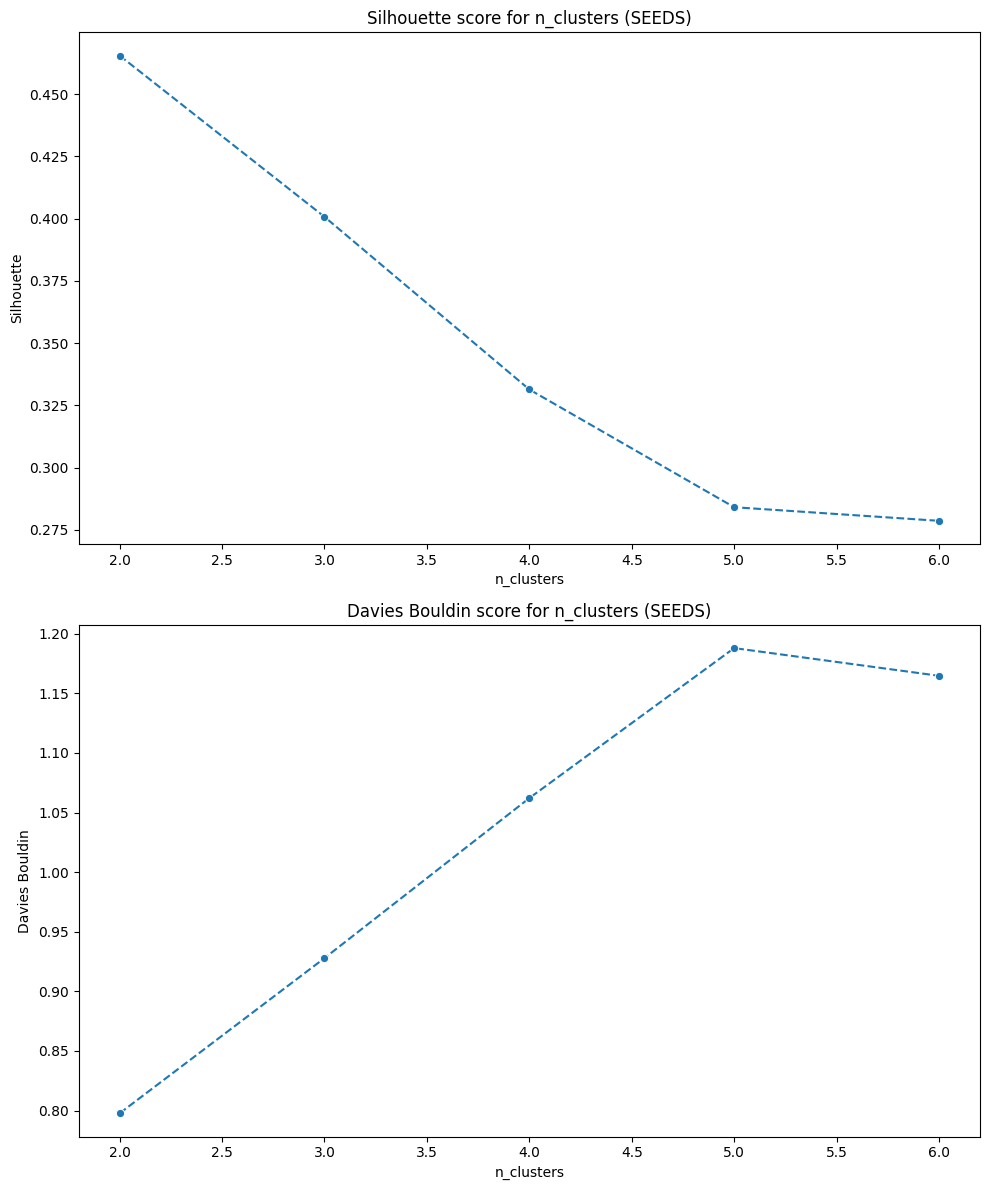

In [73]:
plot_results(results_seeds, "n_clusters", "n_clusters (SEEDS)")

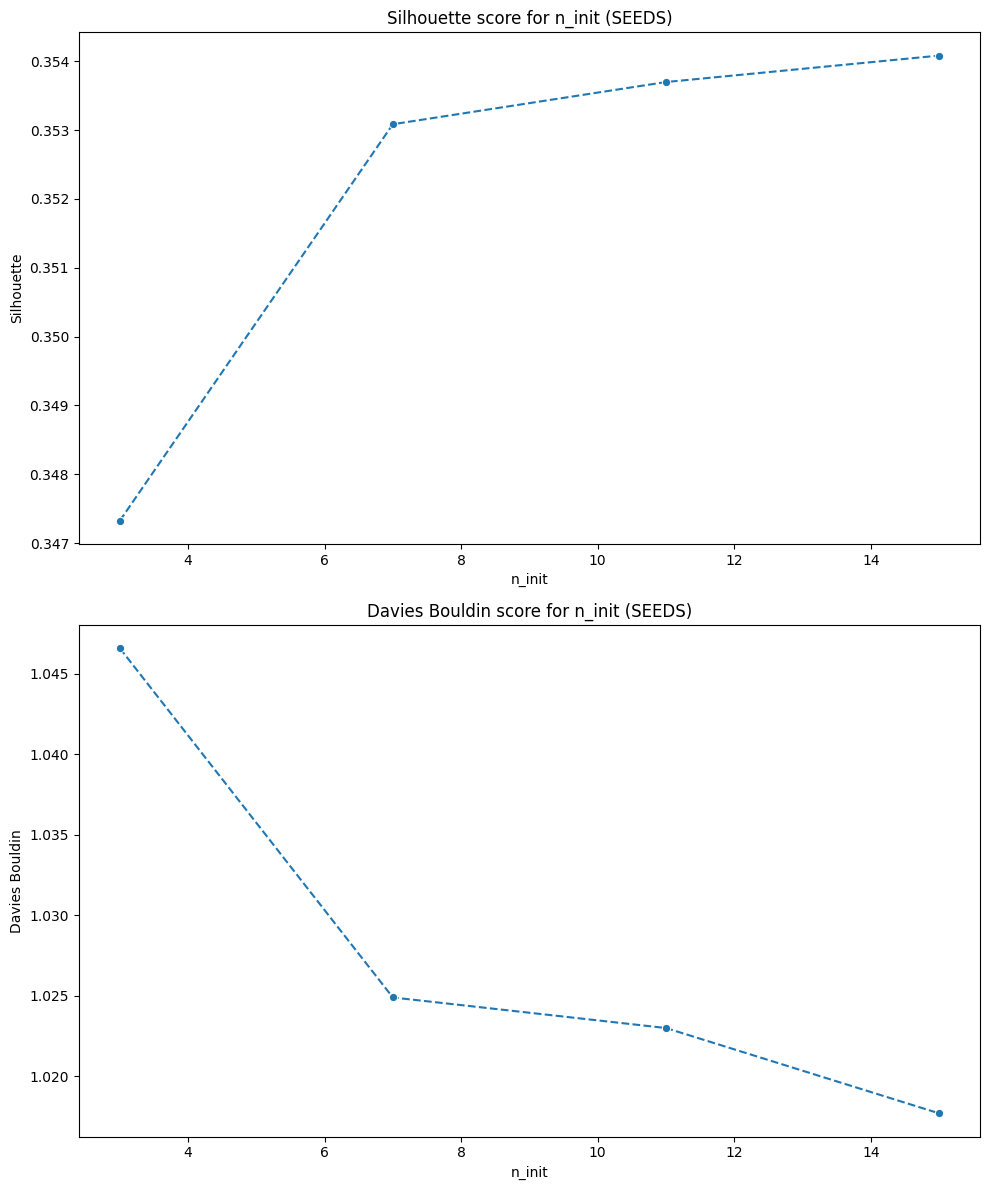

In [72]:
plot_results(results_seeds, "n_init", "n_init (SEEDS)")

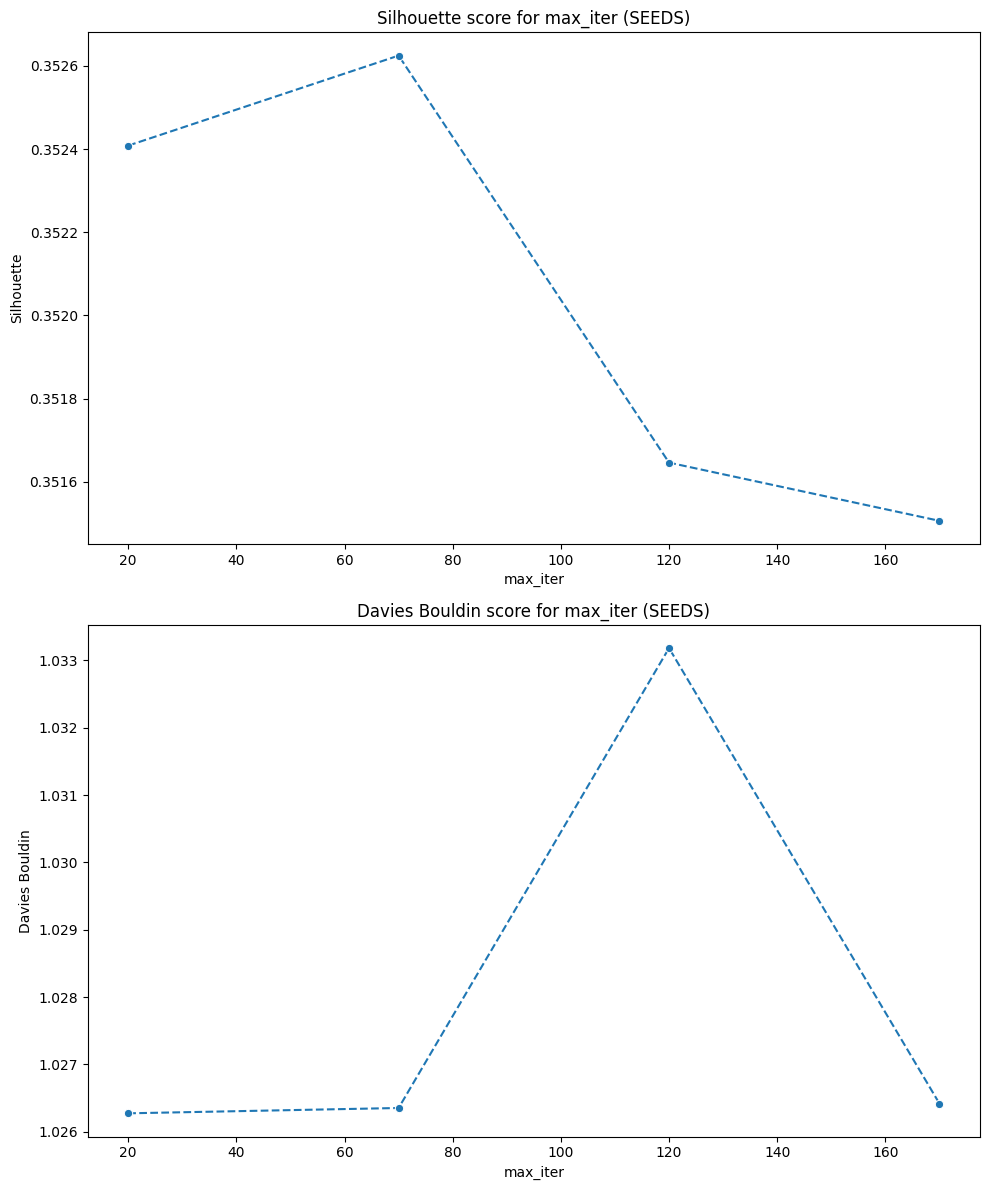

In [71]:
plot_results(results_seeds, "max_iter", "max_iter (SEEDS)")

### GLASS
